## Observations and Insights 

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df= pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [218]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].count()
number_of_mice

1893

In [157]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint_df = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mouse_timepoint_df[["Mouse ID","Timepoint"]]


,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [158]:
# Optional: Get all the data for the duplicate mouse ID. 

all_the_dublicate_mouse=pd.merge(mouse_timepoint_df,mouse_metadata,on="Mouse ID")

all_the_dublicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,55.326122,1,Propriva,Female,21,26
9,g989,20,54.657650,1,Propriva,Female,21,26


In [159]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False, inplace=False)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [215]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_df["Mouse ID"].count()
clean_number_of_mice

1883

## Summary Statistics

In [189]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group= clean_df.groupby("Drug Regimen")
tumor_mean=regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_variance =regimen_group["Tumor Volume (mm3)"].var()
tumor_sd= regimen_group["Tumor Volume (mm3)"].std()
tumor_sem= regimen_group["Tumor Volume (mm3)"].sem()



In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df= pd.DataFrame({"Tumor volume mean":tumor_mean,
"Tumor volume median":tumor_median,
"Tumor volume variance":tumor_variance,
"Tumor volume STD":tumor_sd,
"Tumor volume SEM":tumor_sem})
summary_statistics_df.head()

# Using the aggregation method, produce the same summary statistics in a single line
sammary_single_line=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Tumor_volume_mean='mean', Tumor_volume_median='median',Tumor_volume_variance='var',Tumor_volume_STD='std',Tumor_volume_SEM='sem')
sammary_single_line.head()


,Tumor_volume_mean,Tumor_volume_median,Tumor_volume_variance,Tumor_volume_STD,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

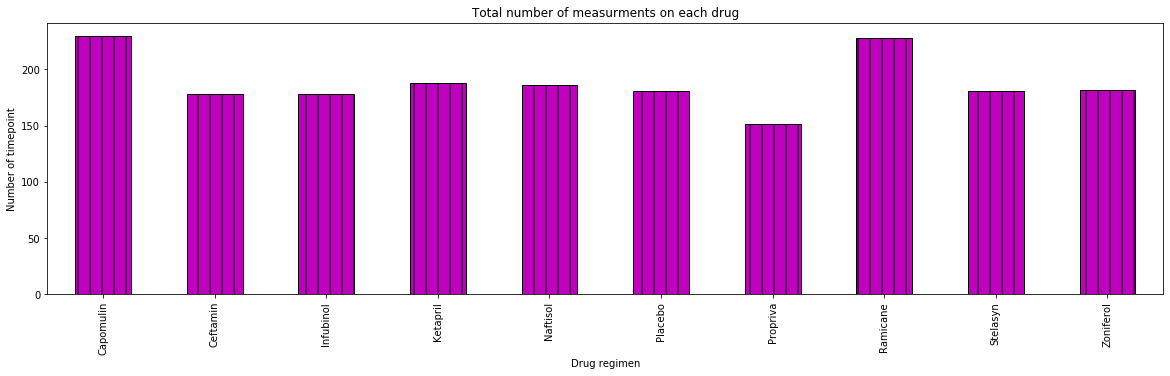

<Figure size 432x288 with 0 Axes>

In [163]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
timepoint = regimen_group["Timepoint"].count()
plt.figure(figsize=(20,5))
drug_chart = timepoint.plot(kind="bar", title="Total number of measurments on each drug",color="m",edgecolor="k",hatch='|')
drug_chart.set_xlabel("Drug regimen")
drug_chart.set_ylabel("Number of timepoint")

plt.show()
plt.tight_layout()


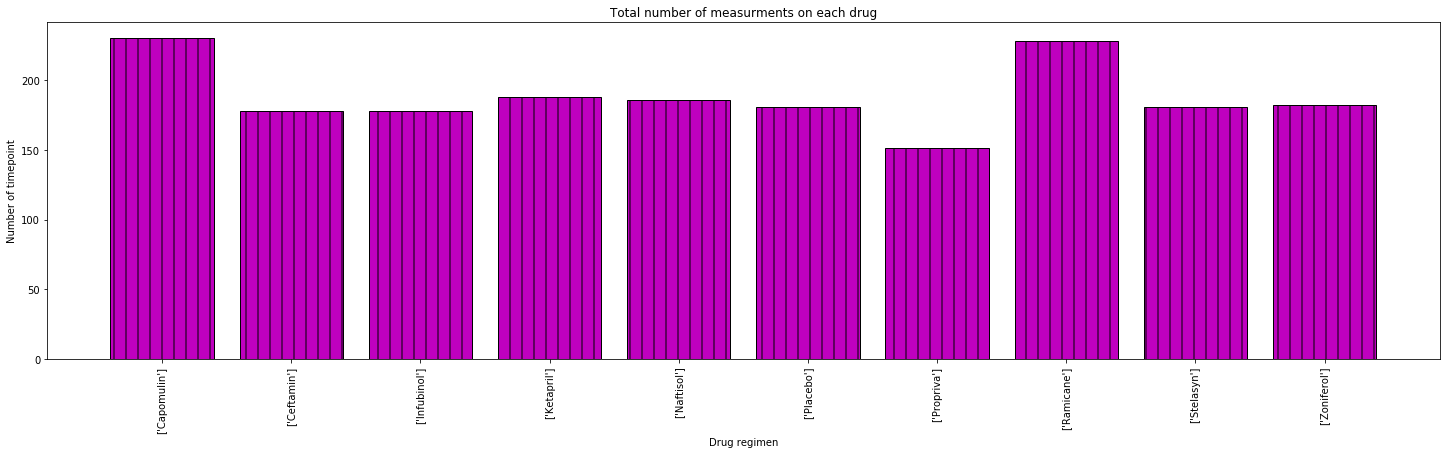

In [212]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names=regimen_group["Drug Regimen"].unique()
plt.figure(figsize=(20,6))

x_axis = np.arange(len(regimen_group))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,timepoint, color='m', edgecolor="k",hatch='|')
plt.xticks(tick_locations,drug_names, rotation="vertical")
plt.tight_layout()
plt.title("Total number of measurments on each drug")
plt.xlabel("Drug regimen")
plt.ylabel("Number of timepoint")
plt.show()

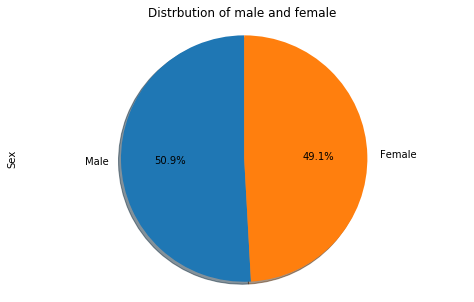

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_of_mice=clean_df["Sex"].value_counts()
micesex_pie = sex_of_mice.plot(kind="pie", title=("Distrbution of male and female "),autopct='%1.1f%%',shadow = True, startangle=90,figsize=(8,5))

plt.axis("equal")
plt.show()


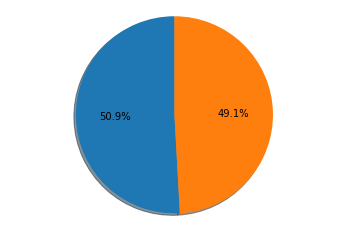

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_of_mice,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [225]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= clean_df.groupby('Mouse ID').max()["Timepoint"]
max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df= pd.merge(max_timepoint,clean_df,on="Timepoint")
tumor_vol = merge_df[(merge_df["Drug Regimen"] == 'Capomulin') | (merge_df["Drug Regimen"] == 'Ramicane') |
(merge_df["Drug Regimen"] == 'Infubinol') | (merge_df["Drug Regimen"] == 'Ceftamin')
]
tumor_vol = tumor_vol[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
tumor_vol

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
40180,x822,Ceftamin,51.914910
40182,y163,Infubinol,54.571076
40185,y769,Ceftamin,55.025724
40186,y865,Ceftamin,52.361982


In [229]:
# Put treatments into a list for for loop (and later for plot labels)
tretment_list = tumor_vol["Drug Regimen"].unique().tolist()
tretment_list
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
volume_of_tumor = tumor_vol["Tumor Volume (mm3)"]
quartiles = volume_of_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of treatment is: {upperq}")
print(f"The interquartile range of treatment is: {iqr}")
print(f"The the median of treatment is: {quartiles[0.5]} ")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of treatment is: 37.61401068
The upper quartile of treatment is: 53.24431157
The interquartile range of treatment is: 15.630300890000001
The the median of treatment is: 45.0 


In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
